<a href="https://colab.research.google.com/github/mgarbanzo/UCR_NOAA_2020/blob/main/SatelitesNOAA2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-taller de Python en la nube para obtener y graficar datos del sensor ABI de GOES 16

## Entrenamiento Virtual en Aplicaciones de Satélites para la RA-IV de la OMM



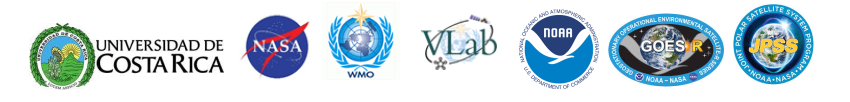

## Primero debemos obtener alguna información para visualizar.

Podemos utilizar los mismos datos utilizados en el pre-taller de Python para uso local. Podemos descargar Canal 2 y 13 para el 17 de Julio del 2019 a las 12:00 UTC. Los enlaces mostrados se obtuvieron de [este enlace](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2019-07-17&hour=12).

In [1]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc

--2020-10-08 05:27:30--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.69.140
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.69.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26480642 (25M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  25.25M  19.6MB/s    in 1.3s    

2020-10-08 05:27:32 (19.6 MB/s) - ‘OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc’ saved [26480642/26480642]



In [2]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C02_G16_s20191981200396_e20191981210104_c20191981210186.nc

--2020-10-08 05:37:39--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2019/198/12/OR_ABI-L2-CMIPF-M6C02_G16_s20191981200396_e20191981210104_c20191981210186.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.137.140
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.137.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348740328 (333M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C02_G16_s20191981200396_e20191981210104_c20191981210186.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>] 332.58M  35.2MB/s    in 10s     

2020-10-08 05:37:50 (32.6 MB/s) - ‘OR_ABI-L2-CMIPF-M6C02_G16_s20191981200396_e20191981210104_c20191981210186.nc’ saved [348740328/348740328]



# Se requieren algunas librerías para poder leer datos satelitales

Una de las librerías más usadas es NetCDF4 que se instala con el siguiente comando:

In [4]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 9.1MB/s 
     |████████████████████████████████| 296kB 47.5MB/s 


Una vez instalada, se puede incorporar en Python junto a otras útiles para visualización:

In [5]:
#%matplotlib inline
import numpy as np
import pylab as plt
from netCDF4 import Dataset
import pandas as pd

In [6]:
ncABIC02 = Dataset("/content/OR_ABI-L2-CMIPF-M6C02_G16_s20191981200396_e20191981210104_c20191981210186.nc")
ncABIC13 = Dataset("/content/OR_ABI-L2-CMIPF-M6C13_G16_s20191981200396_e20191981210116_c20191981210189.nc")

In [8]:
ncABIC02

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 0.5km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CMIPF-M6C02_G16_s20191981200396_e20191981210104_c20191981210186.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single reflective band Cloud and Moisture Imagery Produc

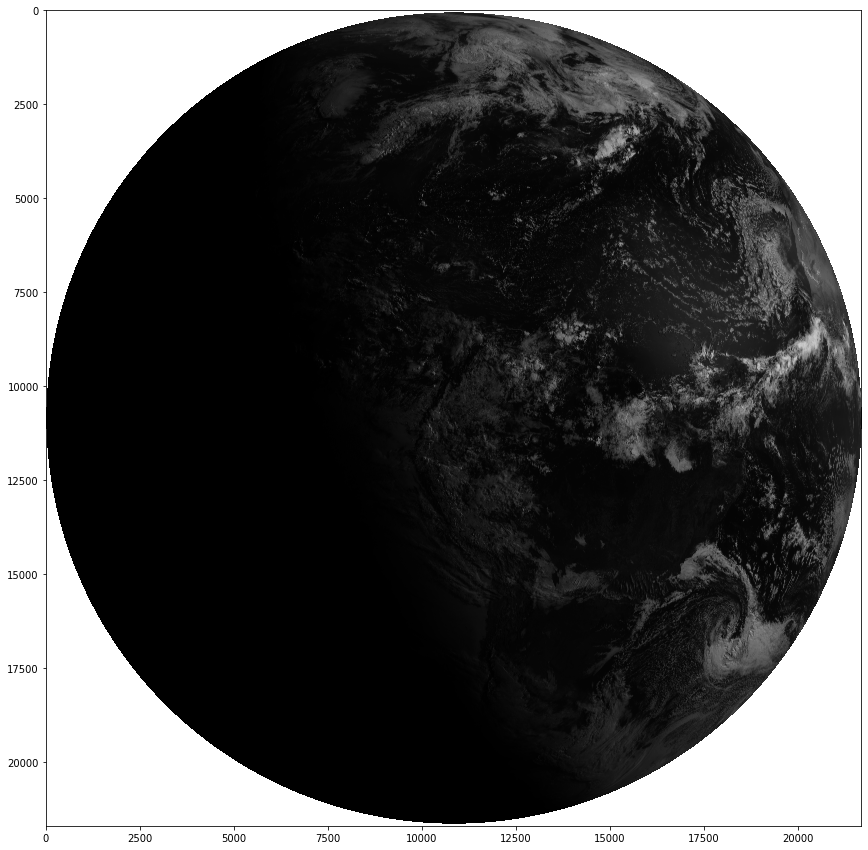

In [10]:
datos = ncABIC02.variables['CMI']
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos,cmap='gray')

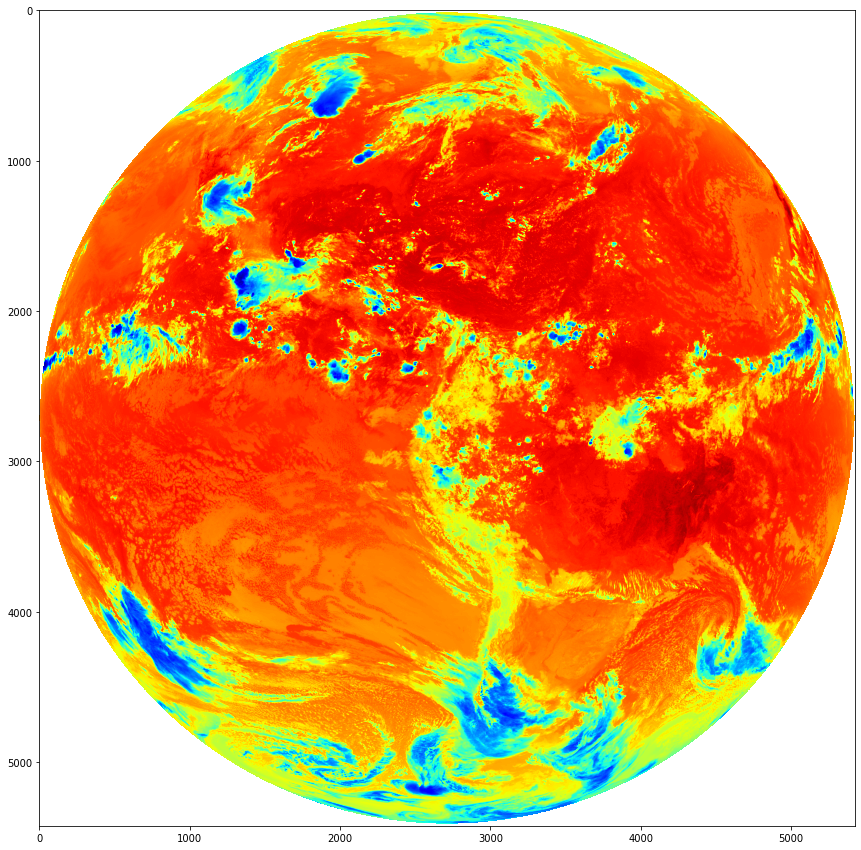

In [11]:
datos = ncABIC13.variables['CMI']
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos,cmap='jet')